In [1]:
import csv #to read in network data

import networkx as nx 
import pandas as pd #data analysis library
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#load the df
#via: http://www.thebaseballcube.com/mlb/people/coaches/byTeam.asp?T=20#
ym = pd.read_csv("/Users/peterbarston/Documents/Outside School/Coding/Outside School Python/Blog Boi/Week of 9.27 - Python:Network Practice/Yankees Managers Historical.csv",
           header = 0,
           index_col = 0,
           na_values = "---",
            sep = ",")
ym.head()

,Stats,Roster,Team Pages,Field Manager,Bench Coach,Hitting Coach,Pitching Coach,First Base Coach,Third Base Coach,Bullpen Coach
Year,,,,,,,,,,
2021,Stats,Roster,Franchise Page,Aaron Boone,Carlos Mendoza,"P.J. Pilittere, Marcus Thames",Matt Blake,Reggie Willits,Phil Nevin,Mike Harkey
2020,Stats,Roster,Franchise Page,Aaron Boone,Carlos Mendoza,"P.J. Pilittere, Marcus Thames",Matt Blake,Reggie Willits,Phil Nevin,Mike Harkey
2019,Stats,Roster,Franchise Page,Aaron Boone,Josh Bard,"P.J. Pilittere, Marcus Thames",Larry Rothschild,Reggie Willits,Phil Nevin,Mike Harkey
2018,Stats,Roster,Franchise Page,Aaron Boone,Josh Bard,"P.J. Pilittere, Marcus Thames",Larry Rothschild,Reggie Willits,Phil Nevin,Mike Harkey
2017,Stats,Roster,Franchise Page,Joe Girardi,Rob Thomson,"Alan Cockrell, Marcus Thames",Larry Rothschild,Tony Pena,Joe Espada,Mike Harkey


In [3]:
#make sure it's a df
print(type(ym))

<class 'pandas.core.frame.DataFrame'>


In [4]:
#drop the unecessary columns
ym = ym.drop(columns=['Stats', 'Roster','Team Pages'])

In [5]:
len(ym)

122

In [6]:
ym = ym.drop(index='Year')

In [7]:
len(ym)

121

In [8]:
ym

,Field Manager,Bench Coach,Hitting Coach,Pitching Coach,First Base Coach,Third Base Coach,Bullpen Coach
Year,,,,,,,
2021,Aaron Boone,Carlos Mendoza,"P.J. Pilittere, Marcus Thames",Matt Blake,Reggie Willits,Phil Nevin,Mike Harkey
2020,Aaron Boone,Carlos Mendoza,"P.J. Pilittere, Marcus Thames",Matt Blake,Reggie Willits,Phil Nevin,Mike Harkey
2019,Aaron Boone,Josh Bard,"P.J. Pilittere, Marcus Thames",Larry Rothschild,Reggie Willits,Phil Nevin,Mike Harkey
2018,Aaron Boone,Josh Bard,"P.J. Pilittere, Marcus Thames",Larry Rothschild,Reggie Willits,Phil Nevin,Mike Harkey
2017,Joe Girardi,Rob Thomson,"Alan Cockrell, Marcus Thames",Larry Rothschild,Tony Pena,Joe Espada,Mike Harkey
...,...,...,...,...,...,...,...
1905,Clark Griffith,NaN,NaN,NaN,NaN,NaN,NaN
1904,Clark Griffith,NaN,NaN,NaN,NaN,NaN,NaN
1903,Clark Griffith,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#drop any NA columns for manager
ym = ym[ym['Field Manager'].notna()]
len(ym)

119

In [10]:
#identify managers fired mid-year (not their staff)
ym2 = ym.loc[ym['Field Manager'].str.contains(",", case=False)]
len(ym2) #15 guys
ym2.head()

,Field Manager,Bench Coach,Hitting Coach,Pitching Coach,First Base Coach,Third Base Coach,Bullpen Coach
Year,,,,,,,
1990,"Bucky Dent, Stump Merrill",NaN,Darrell Evans,Bill Connors,Mike Ferraro,"Buck Showalter , Joe Sparks","Mark Connor, Gary Tuck"
1989,"Bucky Dent, Dallas Green",Charlie Fox,"Frank Howard, Champ Summers",Bill Connors,"Pat Corrales, Mike Ferraro","Lee Elia , Gene Michael",John Stearns
1988,"Billy Martin, Lou Piniella",George Mitterwald,Chris Chambliss,"Clyde King, Stan Williams",Mike Ferraro,"Clete Boyer , Gene Michael",Jeff Torborg
1985,"Yogi Berra, Billy Martin",NaN,Lou Piniella,"Mark Connor, Bill Monbouquette",Stump Merrill,Gene Michael,"Dom Scala, Dom Scala, Jeff Torborg"
1982,"Clyde King, Bob Lemon, Gene Michael",Joe Altobelli,Mickey Vernon,Stan Williams,Yogi Berra,Mike Ferraro,"Dom Scala, Jeff Torborg"


In [11]:
#remove the mid year guys
ym = ym.loc[~ym['Field Manager'].str.contains(",", case=False)]
len(ym)

104

In [12]:
#split any remaining column 

ym[['Hitting Coach 1','Hitting Coach 2']] =ym['Hitting Coach'].str.split(',', expand=True)
ym[['Pitching Coach 1','Pitching Coach 2']] =ym['Pitching Coach'].str.split(',', expand=True)
#note the first and third base coaches don't need splitting because there is never a record with shared duties
#that's why it throws an error



In [13]:
ym.sample()

,Field Manager,Bench Coach,Hitting Coach,Pitching Coach,First Base Coach,Third Base Coach,Bullpen Coach,Hitting Coach 1,Hitting Coach 2,Pitching Coach 1,Pitching Coach 2
Year,,,,,,,,,,,
1913,Frank Chance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ym[['Bullpen Coach 1','Bullpen Coach 2','Bullpen Coach 3']] =ym['Bullpen Coach'].str.split(',', expand=True)

In [15]:
#ensure it's working
ym.sample()

,Field Manager,Bench Coach,Hitting Coach,Pitching Coach,First Base Coach,Third Base Coach,Bullpen Coach,Hitting Coach 1,Hitting Coach 2,Pitching Coach 1,Pitching Coach 2,Bullpen Coach 1,Bullpen Coach 2,Bullpen Coach 3
Year,,,,,,,,,,,,,,
1945,Joe McCarthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#make separate df for cleaned data, but create another one that drops initial HC PC BC columns (now we have that split out)
ym_old = ym
ym = ym.drop(columns=['Hitting Coach', 'Pitching Coach','Bullpen Coach'])

In [17]:
ym.sample()

,Field Manager,Bench Coach,First Base Coach,Third Base Coach,Hitting Coach 1,Hitting Coach 2,Pitching Coach 1,Pitching Coach 2,Bullpen Coach 1,Bullpen Coach 2,Bullpen Coach 3
Year,,,,,,,,,,,
1949,Casey Stengel,NaN,NaN,Frankie Crosetti,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
ym.tail()

,Field Manager,Bench Coach,First Base Coach,Third Base Coach,Hitting Coach 1,Hitting Coach 2,Pitching Coach 1,Pitching Coach 2,Bullpen Coach 1,Bullpen Coach 2,Bullpen Coach 3
Year,,,,,,,,,,,
1907,Clark Griffith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1906,Clark Griffith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905,Clark Griffith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904,Clark Griffith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,Clark Griffith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#replace "none" with NA
ym = ym.fillna(value=np.nan)
ym.head()

,Field Manager,Bench Coach,First Base Coach,Third Base Coach,Hitting Coach 1,Hitting Coach 2,Pitching Coach 1,Pitching Coach 2,Bullpen Coach 1,Bullpen Coach 2,Bullpen Coach 3
Year,,,,,,,,,,,
2021,Aaron Boone,Carlos Mendoza,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Matt Blake,NaN,Mike Harkey,NaN,NaN
2020,Aaron Boone,Carlos Mendoza,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Matt Blake,NaN,Mike Harkey,NaN,NaN
2019,Aaron Boone,Josh Bard,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN
2018,Aaron Boone,Josh Bard,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN
2017,Joe Girardi,Rob Thomson,Tony Pena,Joe Espada,Alan Cockrell,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN


Testing proof of concept (not right yet)

In [20]:
ym.to_csv("/Users/peterbarston/Documents/Outside School/Coding/Outside School Python/Blog Boi/Week of 9.27 - Python:Network Practice/ym_step1.csv",
         na_rep = "NA",
         index = False,
         header = False)

In [21]:
G=nx.read_adjlist("/Users/peterbarston/Documents/Outside School/Coding/Outside School Python/Blog Boi/Week of 9.27 - Python:Network Practice/ym_step1.csv",
             delimiter=",")

list(G.nodes()) #nodes method
#G.nodes() gives a nodeview object, which is like a dict, but not very useful

['Aaron Boone',
 'Carlos Mendoza',
 'Reggie Willits',
 'Phil Nevin',
 'P.J. Pilittere',
 ' Marcus Thames',
 'Matt Blake',
 'NA',
 'Mike Harkey',
 'Josh Bard',
 'Larry Rothschild',
 'Joe Girardi',
 'Rob Thomson',
 'Tony Pena',
 'Joe Espada',
 'Alan Cockrell',
 ' Jeff Pentland',
 'Gary Tuck',
 'Mick Kelleher',
 'Kevin Long',
 'Dave Eiland',
 'Bob Meacham',
 ' Tommy Phelps',
 'Joe Torre',
 'Don Mattingly',
 'Larry Bowa',
 'Ron Guidry',
 'Joe Kerrigan',
 'Lee Mazzilli',
 'Roy White',
 'Luis Sojo',
 'Mel Stottlemyre',
 'Neil Allen',
 'Willie Randolph',
 'Rich Monteleone',
 'Don Zimmer',
 'Rick Down',
 'Gary Denbo',
 'Tony Cloninger',
 'Chris Chambliss',
 'Jose Cardenal',
 'Buck Showalter',
 'Brian Butterfield',
 'Bill Connors',
 ' Nardi Contreras',
 'Clete Boyer',
 'Ed Napoleon',
 'Mark Connor',
 'Russ Meyer',
 'Frank Howard',
 'Stump Merrill',
 'Mike Ferraro',
 'Graig Nettles',
 'Marc Hill',
 'Lou Piniella',
 'Jay Ward',
 'Jeff Torborg',
 'Gene Michael',
 'Joe Altobelli',
 'Willie Horton',

In [22]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 103
Number of edges: 147
Average degree:   2.8544


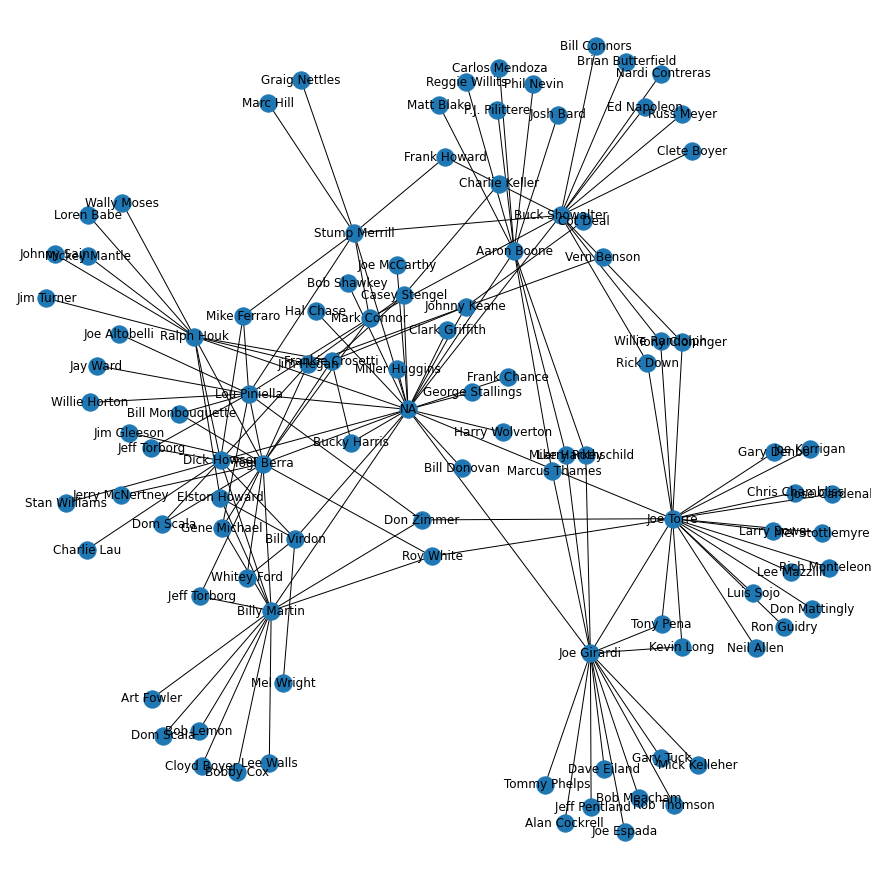

In [23]:
layout = nx.spring_layout(G)
plt.figure(figsize=(12,12)) 
nx.draw(G,layout,with_labels=True)
plt.savefig("/Users/peterbarston/Documents/Outside School/Coding/Outside School Python/Blog Boi/Week of 9.27 - Python:Network Practice/ym_testpic.png")
plt.show()

Swapping columns

In [24]:
import numpy as np

In [25]:
ym_array = ym.to_numpy()

In [26]:
#test it worked1
ym.head()

,Field Manager,Bench Coach,First Base Coach,Third Base Coach,Hitting Coach 1,Hitting Coach 2,Pitching Coach 1,Pitching Coach 2,Bullpen Coach 1,Bullpen Coach 2,Bullpen Coach 3
Year,,,,,,,,,,,
2021,Aaron Boone,Carlos Mendoza,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Matt Blake,NaN,Mike Harkey,NaN,NaN
2020,Aaron Boone,Carlos Mendoza,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Matt Blake,NaN,Mike Harkey,NaN,NaN
2019,Aaron Boone,Josh Bard,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN
2018,Aaron Boone,Josh Bard,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN
2017,Joe Girardi,Rob Thomson,Tony Pena,Joe Espada,Alan Cockrell,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN


In [27]:
#test it worked2
print("Original array:")
print(ym_array)

Original array:
[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [28]:
#make the first change:
bench_coach_array = np.copy(ym_array)
bench_coach_array[:,[0, 1]] = bench_coach_array[:,[1, 0]]
print("\nAfter swapping arrays:")
print(bench_coach_array)


After swapping arrays:
[['Carlos Mendoza' 'Aaron Boone' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Carlos Mendoza' 'Aaron Boone' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Josh Bard' 'Aaron Boone' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 [nan 'Clark Griffith' nan ... nan nan nan]
 [nan 'Clark Griffith' nan ... nan nan nan]
 [nan 'Clark Griffith' nan ... nan nan nan]]


In [29]:
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


Iterate

In [30]:
#new array - 1b
first_base_array = np.copy(ym_array)
first_base_array[:,[0, 2]] = first_base_array[:,[2, 0]]
print("\nAfter swapping arrays:")
print(first_base_array)


After swapping arrays:
[['Reggie Willits' 'Carlos Mendoza' 'Aaron Boone' ... 'Mike Harkey' nan
  nan]
 ['Reggie Willits' 'Carlos Mendoza' 'Aaron Boone' ... 'Mike Harkey' nan
  nan]
 ['Reggie Willits' 'Josh Bard' 'Aaron Boone' ... 'Mike Harkey' nan nan]
 ...
 [nan nan 'Clark Griffith' ... nan nan nan]
 [nan nan 'Clark Griffith' ... nan nan nan]
 [nan nan 'Clark Griffith' ... nan nan nan]]


In [31]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [32]:
#new array - 3b
third_base_array = np.copy(ym_array)
third_base_array[:,[0, 3]] = third_base_array[:,[3, 0]]
print("\nAfter swapping arrays:")
print(third_base_array)


After swapping arrays:
[['Phil Nevin' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Phil Nevin' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Phil Nevin' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [33]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [34]:
#new array - hc1
hitting_coach_1_array = np.copy(ym_array)
hitting_coach_1_array[:,[0, 4]] = hitting_coach_1_array[:,[4, 0]]
print("\nAfter swapping arrays:")
print(hitting_coach_1_array)


After swapping arrays:
[['P.J. Pilittere' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey'
  nan nan]
 ['P.J. Pilittere' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey'
  nan nan]
 ['P.J. Pilittere' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [35]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [36]:
#new array - hc2
hitting_coach_2_array = np.copy(ym_array)
hitting_coach_2_array[:,[0, 5]] = hitting_coach_2_array[:,[5, 0]]
print("\nAfter swapping arrays:")
print(hitting_coach_2_array)


After swapping arrays:
[[' Marcus Thames' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey'
  nan nan]
 [' Marcus Thames' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey'
  nan nan]
 [' Marcus Thames' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [37]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [38]:
#new array - pc1
pitching_coach_1_array = np.copy(ym_array)
pitching_coach_1_array[:,[0, 6]] = pitching_coach_1_array[:,[6, 0]]
print("\nAfter swapping arrays:")
print(pitching_coach_1_array)


After swapping arrays:
[['Matt Blake' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Matt Blake' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Larry Rothschild' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [39]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [40]:
#new array - pc2
pitching_coach_2_array = np.copy(ym_array)
pitching_coach_2_array[:,[0, 7]] = pitching_coach_2_array[:,[7, 0]]
print("\nAfter swapping arrays:")
print(pitching_coach_2_array)


After swapping arrays:
[[nan 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 [nan 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 [nan 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [41]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [42]:
#new array - bc1
bullpen_coach_1_array = np.copy(ym_array)
bullpen_coach_1_array[:,[0, 8]] = bullpen_coach_1_array[:,[8, 0]]
print("\nAfter swapping arrays:")
print(bullpen_coach_1_array)


After swapping arrays:
[['Mike Harkey' 'Carlos Mendoza' 'Reggie Willits' ... 'Aaron Boone' nan
  nan]
 ['Mike Harkey' 'Carlos Mendoza' 'Reggie Willits' ... 'Aaron Boone' nan
  nan]
 ['Mike Harkey' 'Josh Bard' 'Reggie Willits' ... 'Aaron Boone' nan nan]
 ...
 [nan nan nan ... 'Clark Griffith' nan nan]
 [nan nan nan ... 'Clark Griffith' nan nan]
 [nan nan nan ... 'Clark Griffith' nan nan]]


In [43]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [44]:
#new array - bc2
bullpen_coach_2_array = np.copy(ym_array)
bullpen_coach_2_array[:,[0, 9]] = bullpen_coach_2_array[:,[9, 0]]
print("\nAfter swapping arrays:")
print(bullpen_coach_2_array)


After swapping arrays:
[[nan 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' 'Aaron Boone'
  nan]
 [nan 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' 'Aaron Boone'
  nan]
 [nan 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' 'Aaron Boone' nan]
 ...
 [nan nan nan ... nan 'Clark Griffith' nan]
 [nan nan nan ... nan 'Clark Griffith' nan]
 [nan nan nan ... nan 'Clark Griffith' nan]]


In [45]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [46]:
#new array - bc3
bullpen_coach_3_array = np.copy(ym_array)
bullpen_coach_3_array[:,[0, 10]] = bullpen_coach_3_array[:,[10, 0]]
print("\nAfter swapping arrays:")
print(bullpen_coach_3_array)


After swapping arrays:
[[nan 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  'Aaron Boone']
 [nan 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  'Aaron Boone']
 [nan 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan 'Aaron Boone']
 ...
 [nan nan nan ... nan nan 'Clark Griffith']
 [nan nan nan ... nan nan 'Clark Griffith']
 [nan nan nan ... nan nan 'Clark Griffith']]


In [47]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


Ultimately we will make a giant adjancency list by concatenating the new arrays.  Don't forget to drop any rows with NaN in the first column

In [48]:
total_array = np.concatenate((ym_array,
 bench_coach_array,
 first_base_array,
 third_base_array,
 hitting_coach_1_array,
 hitting_coach_2_array,
 pitching_coach_1_array,
 pitching_coach_2_array,
 bullpen_coach_1_array,
 bullpen_coach_2_array,
 bullpen_coach_3_array),axis = 0)

In [49]:
#test it worked
len(total_array) - (len(ym_array)*11)

0

Quick Interlude - could be useful objects for the future

In [50]:
#could be useful in future
array_list = list(("ym_array",
                   "bench_coach_array",
                   "first_base_array",
                   "third_base_array",
                   "hitting_coach_1_array",
                   "hitting_coach_2_array",
                   "pitching_coach_1_array",
                   "pitching_coach_2_array",
                   "bullpen_coach_1_array",
                   "bullpen_coach_2_array",
                   "bullpen_coach_3_array"))
array_list

['ym_array',
 'bench_coach_array',
 'first_base_array',
 'third_base_array',
 'hitting_coach_1_array',
 'hitting_coach_2_array',
 'pitching_coach_1_array',
 'pitching_coach_2_array',
 'bullpen_coach_1_array',
 'bullpen_coach_2_array',
 'bullpen_coach_3_array']

In [51]:
list(ym)

['Field Manager',
 'Bench Coach',
 'First Base Coach',
 'Third Base Coach',
 'Hitting Coach 1',
 'Hitting Coach 2',
 'Pitching Coach 1',
 'Pitching Coach 2',
 'Bullpen Coach 1',
 'Bullpen Coach 2',
 'Bullpen Coach 3']

OK BACK AT IT

In [52]:
#convert back to DF
total_df = pd.DataFrame(total_array,
                   columns = list(ym))
total_df.head()

,Field Manager,Bench Coach,First Base Coach,Third Base Coach,Hitting Coach 1,Hitting Coach 2,Pitching Coach 1,Pitching Coach 2,Bullpen Coach 1,Bullpen Coach 2,Bullpen Coach 3
0,Aaron Boone,Carlos Mendoza,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Matt Blake,NaN,Mike Harkey,NaN,NaN
1,Aaron Boone,Carlos Mendoza,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Matt Blake,NaN,Mike Harkey,NaN,NaN
2,Aaron Boone,Josh Bard,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN
3,Aaron Boone,Josh Bard,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN
4,Joe Girardi,Rob Thomson,Tony Pena,Joe Espada,Alan Cockrell,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN


In [53]:
#test it worked
len(total_df)-(len(ym_array)*11)

0

In [54]:
#see how many we should be losing
#as a reminder
len(total_df)

1144

In [55]:
total_df.isna().sum()

Field Manager        734
Bench Coach          700
First Base Coach     560
Third Base Coach     390
Hitting Coach 1      630
Hitting Coach 2      970
Pitching Coach 1     530
Pitching Coach 2    1010
Bullpen Coach 1      520
Bullpen Coach 2     1000
Bullpen Coach 3     1030
dtype: int64

In [56]:
#so we should expect
len(total_df) - total_df['Field Manager'].isna().sum()

410

In [57]:
#drop rows that start with NA
total_df = total_df[total_df['Field Manager'].notna()]

In [58]:
len(total_df)

410

Let's convert to a graph

In [59]:
total_df.to_csv("/Users/peterbarston/Documents/Outside School/Coding/Outside School Python/Blog Boi/Week of 9.27 - Python:Network Practice/total_df.csv",
         na_rep = "NA",
        index = False,
         header = False)

In [60]:
G=nx.read_adjlist("/Users/peterbarston/Documents/Outside School/Coding/Outside School Python/Blog Boi/Week of 9.27 - Python:Network Practice/total_df.csv",
             delimiter=",")

list(G.nodes()) #nodes method
#G.nodes() gives a nodeview object, which is like a dict, but not very useful

['Aaron Boone',
 'Carlos Mendoza',
 'Reggie Willits',
 'Phil Nevin',
 'P.J. Pilittere',
 ' Marcus Thames',
 'Matt Blake',
 'NA',
 'Mike Harkey',
 'Josh Bard',
 'Larry Rothschild',
 'Joe Girardi',
 'Rob Thomson',
 'Tony Pena',
 'Joe Espada',
 'Alan Cockrell',
 ' Jeff Pentland',
 'Gary Tuck',
 'Mick Kelleher',
 'Kevin Long',
 'Dave Eiland',
 'Bob Meacham',
 ' Tommy Phelps',
 'Joe Torre',
 'Don Mattingly',
 'Larry Bowa',
 'Ron Guidry',
 'Joe Kerrigan',
 'Lee Mazzilli',
 'Roy White',
 'Luis Sojo',
 'Mel Stottlemyre',
 'Neil Allen',
 'Willie Randolph',
 'Rich Monteleone',
 'Don Zimmer',
 'Rick Down',
 'Gary Denbo',
 'Tony Cloninger',
 'Chris Chambliss',
 'Jose Cardenal',
 'Buck Showalter',
 'Brian Butterfield',
 'Bill Connors',
 ' Nardi Contreras',
 'Clete Boyer',
 'Ed Napoleon',
 'Mark Connor',
 'Russ Meyer',
 'Frank Howard',
 'Stump Merrill',
 'Mike Ferraro',
 'Graig Nettles',
 'Marc Hill',
 'Lou Piniella',
 'Jay Ward',
 'Jeff Torborg',
 'Gene Michael',
 'Joe Altobelli',
 'Willie Horton',

In [61]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 108
Number of edges: 627
Average degree:  11.6111


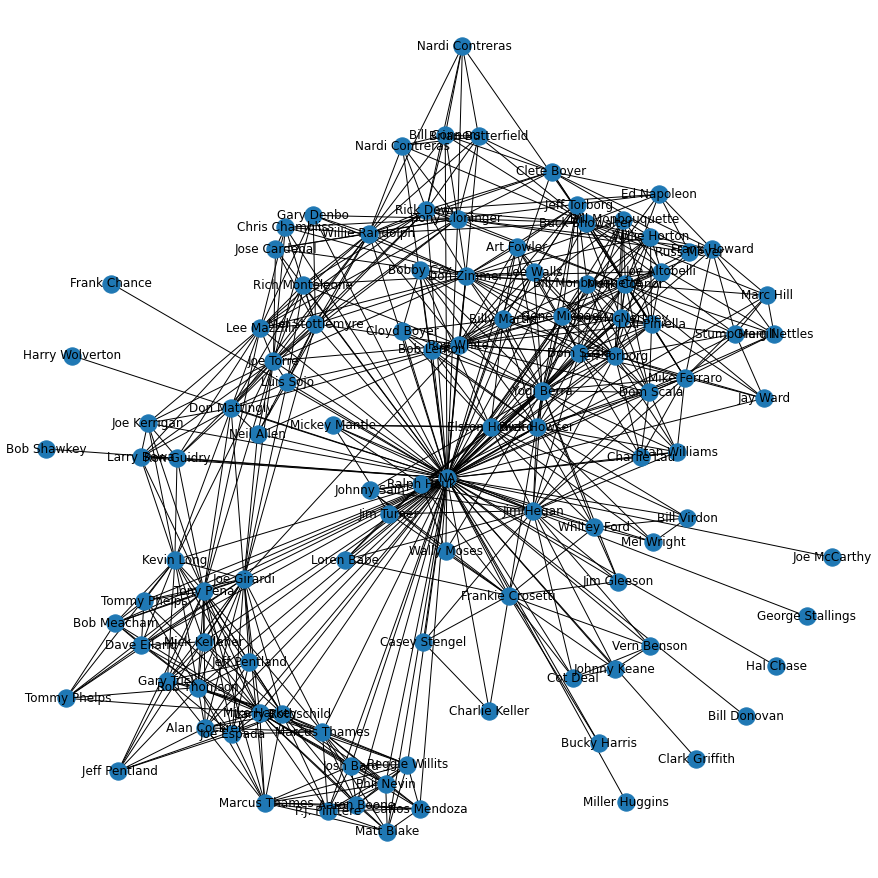

In [62]:
layout = nx.spring_layout(G)
plt.figure(figsize=(12,12)) 
nx.draw(G,layout,with_labels=True)
plt.savefig("/Users/peterbarston/Documents/Outside School/Coding/Outside School Python/Blog Boi/Week of 9.27 - Python:Network Practice/ym_testpic2.png")
plt.show()

And Let's Get rid of that annoying NA guy

In [63]:
#the NA node is not real
G.remove_node("NA")

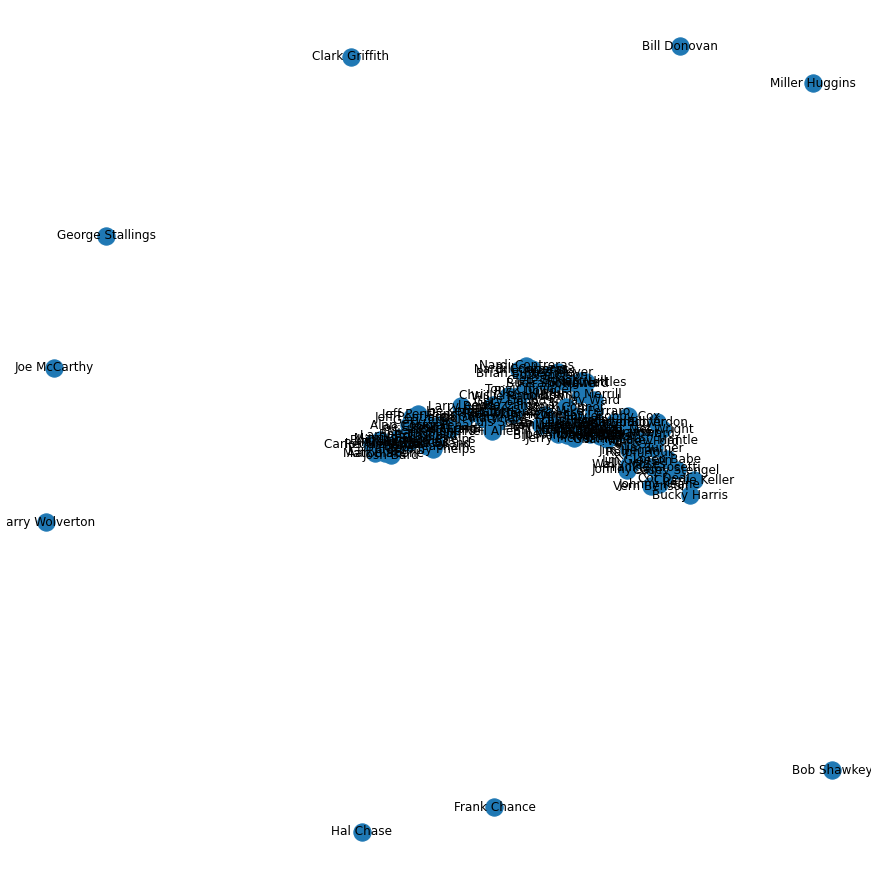

In [64]:
layout = nx.spring_layout(G)
plt.figure(figsize=(12,12)) 
nx.draw(G,layout,with_labels=True)
plt.savefig("/Users/peterbarston/Documents/Outside School/Coding/Outside School Python/Blog Boi/Week of 9.27 - Python:Network Practice/ym_bestpic.png")
plt.show()

In [65]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 107
Number of edges: 527
Average degree:   9.8505


In [66]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[98, 1, 1, 1, 1, 1, 1, 1, 1, 1]